In [4]:
import pandas as pd #for storing and manipulating data
import numpy as np #for computing numeric data esp linear alg
#import sklearn #has all the models to train
import matplotlib.pyplot as plt #visualize the data, built on top of numpy
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv("train.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Pre-processing

In [13]:
#Dropping unecessary columns
df.drop(["PassengerId","Name","Ticket","Embarked"],axis=1,inplace=True)

In [17]:
#Visualize columns
import seaborn as sns

In [16]:
#df.isnull(df["cabin"]).sum() for a particular column
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

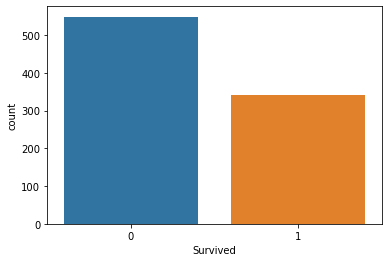

In [20]:
#check if data is skewed (class balance)
sns.countplot(x='Survived', data = df)
#0-not survived, 1-survived

<AxesSubplot:xlabel='Pclass', ylabel='count'>

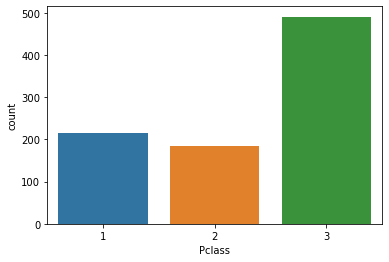

In [21]:
sns.countplot(x='Pclass', data = df)

In [22]:
#Separate out target data from entire data
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN


In [23]:
df.drop(['Cabin'],axis=1,inplace=True)

<AxesSubplot:>

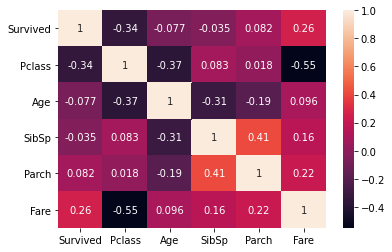

In [28]:
#Check correlation
sns.heatmap(df.corr(), color='r', annot=True)

In [29]:
#Handle missing values for AGE
df.count

<bound method DataFrame.count of      Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0           0       3    male  22.0      1      0   7.2500
1           1       1  female  38.0      1      0  71.2833
2           1       3  female  26.0      0      0   7.9250
3           1       1  female  35.0      1      0  53.1000
4           0       3    male  35.0      0      0   8.0500
..        ...     ...     ...   ...    ...    ...      ...
886         0       2    male  27.0      0      0  13.0000
887         1       1  female  19.0      0      0  30.0000
888         0       3  female   NaN      1      2  23.4500
889         1       1    male  26.0      0      0  30.0000
890         0       3    male  32.0      0      0   7.7500

[891 rows x 7 columns]>

In [39]:
#891 rows and age for 177 rows is missing
df.fillna(df.median(),inplace=True)

In [45]:
#Encode sex data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
df.head(20)

In [51]:
x = df.iloc[:, 1:8].values
y = df.iloc[:, 0].values

In [52]:
#Scaling train data afer splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [56]:
#Choosing a model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [59]:
y_pred = model.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8100558659217877